In [1]:
import pandas as pd

In [2]:
# mt_init = pd.read_csv('../data/prod_mt.MT_init.csv')

In [3]:
agg_session = pd.read_csv('../data/agg_data.agg_session.csv', index_col=0).drop(columns=['event_date', 'process_date', 'app_bundle_id'])
agg_session = agg_session[(agg_session['install_datetime'] >= '2022-02-01') & (agg_session['install_datetime'] < '2022-03-01')]
agg_session = agg_session.sort_values(['install_datetime', 'user_id', 'start_session'])

In [4]:
mt_level_start = pd.read_csv('../data/prod_mt.MT_level_start.csv', index_col=0).astype({'booster_1_count': int, 'booster_2_count': int, 'booster_3_count': int})

In [5]:
mt_level_end = pd.read_csv('../data/prod_mt.MT_level_end.csv', index_col=0).fillna(0).astype({'booster_1_count': int, 'booster_2_count': int, 'booster_3_count': int})

In [6]:
mt_click_button = pd.read_csv('../data/prod_mt.MT_click_button.csv', index_col=0)

In [7]:
mt_math_exercise = pd.read_csv('../data/prod_mt.MT_math_exercise.csv', index_col=0).drop(columns=['send_age']).astype({'exercise_result': int})

In [8]:
mt_session_end = pd.read_csv('../data/prod_mt.MT_session_end.csv', index_col=0)

In [9]:
mt_show_windows = pd.read_csv('../data/prod_mt.MT_show_windows.csv', index_col=0)

# Clear data

In [10]:
target = (agg_session['user_id'] == agg_session['user_id'].shift(-1)).astype(int)
agg_session = agg_session.assign(target=target)
agg_session 

,user_id,session_id,start_session,end_session,install_datetime,LT,session_time,match_count,target
29870,c657ed95d67f06eae4d11e2189d98a5f,B417BA6B6BC1470EA7F2BD29C0758425,2022-02-01 01:53:40+00:00,2022-02-01 01:53:40+00:00,2022-02-01 01:53:40+00:00,0,0.000000,0,1
111093,c657ed95d67f06eae4d11e2189d98a5f,B417BA6B6BC1470EA7F2BD29C0758425,2022-02-01 01:53:40+00:00,2022-02-01 01:53:40+00:00,2022-02-01 01:53:40+00:00,0,0.000000,0,1
111094,c657ed95d67f06eae4d11e2189d98a5f,B417BA6B6BC1470EA7F2BD29C0758425,2022-02-01 01:53:40+00:00,2022-02-01 01:53:40+00:00,2022-02-01 01:53:40+00:00,0,0.000000,0,1
111095,c657ed95d67f06eae4d11e2189d98a5f,B417BA6B6BC1470EA7F2BD29C0758425,2022-02-01 01:53:40+00:00,2022-02-01 01:53:40+00:00,2022-02-01 01:53:40+00:00,0,0.000000,0,1
30218,c657ed95d67f06eae4d11e2189d98a5f,926352ABCC6F46EEB4EE2FDB4CDBE5D6,2022-02-02 18:47:45+00:00,2022-02-02 18:47:45+00:00,2022-02-01 01:53:40+00:00,1,0.000000,1,1
...,...,...,...,...,...,...,...,...,...
3310,c584e0ac3add8fd309fbefae31fef8e8,8C84507455654FB58B583A1128602671,2022-03-04 18:29:27+00:00,2022-03-04 18:38:05+00:00,2022-02-28 23:27:08+00:00,3,8.633333,3,1
3309,c584e0ac3add8fd309fbefae31fef8e8,CA068A4F70F945159506944F6FF45104,2022-03-04 19:17:16+00:00,2022-03-04 19:19:34+00:00,2022-02-28 23:27:08+00:00,3,2.300000,1,1
84168,c584e0ac3add8fd309fbefae31fef8e8,584D7B35019D45D0BF4BAF76B9B9EFFC,2022-03-04 21:56:26+00:00,2022-03-04 21:59:33+00:00,2022-02-28 23:27:08+00:00,3,3.116667,2,1
84170,c584e0ac3add8fd309fbefae31fef8e8,1DA9773BDA7C42C689F09ECF4954FB53,2022-03-04 22:00:53+00:00,2022-03-04 22:08:33+00:00,2022-02-28 23:27:08+00:00,3,7.666667,3,1


In [11]:
import numpy as np

def count_unique(data: pd.Series) -> int:
    return len(data.unique())

def count_zeroes(data: pd.Series) -> int:
    return np.count_nonzero(data == 0)

def count_ones(data: pd.Series) -> int:
    return np.count_nonzero(data == 1)
    

In [12]:
def default_filter(df: pd.DataFrame) -> pd.DataFrame:
    df = df[df['session_id'].isin(agg_session['session_id'])]
    df = df.drop(columns=[
        'meta_accepted_at',
        'process_date',
        'event_id',
        'event_name',
        'event_date',
        'client_version',
        'install_id',
        'app_bundle_id',
        'device_langauge',
    ], errors='ignore')
    df = df.sort_values(['user_id', 'event_datetime'])
    df = df.fillna(0)
    return df

def level_agg(df: pd.DataFrame) -> pd.DataFrame:
    df_agg = df.groupby('session_id').agg({
        'device_hw_model': ['min'],
        'platform': ['min'],
        'match_type': ['count'],
        'match_count': [count_unique],
        'moves': ['min', 'max', 'sum', 'mean', 'median'],
        'goal_1_count': ['min', 'max', 'sum', 'mean', 'median'],
        'goal_2_count': ['min', 'max', 'sum', 'mean', 'median'],
        'goal_3_count': ['min', 'max', 'sum', 'mean', 'median'],
        'goal_4_count': ['min', 'max', 'sum', 'mean', 'median'],
        'booster_1_count': ['min', 'max', 'sum', 'mean', 'median'],
        'booster_2_count': ['min', 'max', 'sum', 'mean', 'median'],
        'booster_3_count': ['min', 'max', 'sum', 'mean', 'median'],
        'is_match_Campaign': ['sum'],
        'is_match_Cycled': ['sum'],
        'is_match_Lives': ['sum'],
        'is_match_Busters': ['sum'],
        'is_match_Skills': ['sum'],
        # 'device_hw_model': ['min', 'max', 'sum', 'count', 'mean', 'median', count_unique, 'unique'],
    })

    return df_agg

def click_button_agg(df: pd.DataFrame) -> pd.DataFrame:
    df_agg = (df.drop(columns=['user_id', 'event_datetime', 'device_hw_model', 'platform', 'button_id', 'from_page'])
                .groupby('session_id')
                .agg('sum'))

    return df_agg

def math_exercise_agg(df: pd.DataFrame) -> pd.DataFrame:
    df_agg = df.groupby('session_id').agg({'exercise_result': [count_zeroes, count_ones]})
    return df_agg

def filter_agg_level_data(df: pd.DataFrame, agg_func: callable, filter_func: callable = default_filter, col_prefix: str = None,) -> pd.DataFrame:
    df = filter_func(df)
    df_agg = agg_func(df)
    if col_prefix:
        df_agg.columns = [ col_prefix + '__'.join(col) for col in df_agg.columns.to_flat_index()]
    return df_agg

In [13]:
match_types_ls = {f"is_match_{match}": (mt_level_start['match_type'] == match).astype(int) for match in mt_level_start['match_type'].unique()}
mt_level_start_agg = filter_agg_level_data(mt_level_start.assign(**match_types_ls), agg_func=level_agg,  col_prefix='ls__')
mt_level_start_agg.head()

,ls__device_hw_model__min,ls__platform__min,ls__match_type__count,ls__match_count__count_unique,ls__moves__min,ls__moves__max,ls__moves__sum,ls__moves__mean,ls__moves__median,ls__goal_1_count__min,...,ls__booster_3_count__min,ls__booster_3_count__max,ls__booster_3_count__sum,ls__booster_3_count__mean,ls__booster_3_count__median,ls__is_match_Campaign__sum,ls__is_match_Cycled__sum,ls__is_match_Lives__sum,ls__is_match_Busters__sum,ls__is_match_Skills__sum
session_id,,,,,,,,,,,,,,,,,,,,,
0002630A63434FF2B79B187D7817BE47,Xiaomi Redmi 7A,android,28,14,15,30,664,23.714286,24.0,6,...,0,0,0,0.0,0.0,28,0,0,0,0
00030C26A30843C396E335DECE31B47E,vivo vivo 1820,android,5,5,23,30,133,26.600000,27.0,1,...,0,0,0,0.0,0.0,1,0,0,4,0
0003204D3C05458C9CE39F826CB41E3D,samsung SM-A320F,android,8,1,30,30,240,30.000000,30.0,42,...,0,0,0,0.0,0.0,0,0,0,8,0
00046EF38BF245D7A984CB832362AA48,samsung SM-M127F,android,2,2,20,25,45,22.500000,22.5,15,...,0,0,0,0.0,0.0,2,0,0,0,0
0004A75547744AA187E2F7273A82C8E5,samsung SM-A525F,android,12,2,15,20,210,17.500000,17.5,6,...,0,0,0,0.0,0.0,12,0,0,0,0


In [14]:
match_types_le = {f"is_match_{match}": (mt_level_end['match_type'] == match).astype(int) for match in mt_level_end['match_type'].unique()}
mt_level_end_agg = filter_agg_level_data(mt_level_end.assign(**match_types_le), agg_func=level_agg, col_prefix='le__')
mt_level_end_agg.head()

,le__device_hw_model__min,le__platform__min,le__match_type__count,le__match_count__count_unique,le__moves__min,le__moves__max,le__moves__sum,le__moves__mean,le__moves__median,le__goal_1_count__min,...,le__booster_3_count__min,le__booster_3_count__max,le__booster_3_count__sum,le__booster_3_count__mean,le__booster_3_count__median,le__is_match_Campaign__sum,le__is_match_Cycled__sum,le__is_match_Lives__sum,le__is_match_Busters__sum,le__is_match_Skills__sum
session_id,,,,,,,,,,,,,,,,,,,,,
0000185903844FF4A4D3C076530F6A12,OPPO CPH2069,android,1,1,0.0,0.0,0.0,0.0,0.0,9,...,0,0,0,0.0,0.0,0,0,0,1,0
0002630A63434FF2B79B187D7817BE47,Xiaomi Redmi 7A,android,52,13,0.0,0.0,0.0,0.0,0.0,6,...,0,0,0,0.0,0.0,52,0,0,0,0
00030C26A30843C396E335DECE31B47E,vivo vivo 1820,android,4,4,0.0,0.0,0.0,0.0,0.0,1,...,0,0,0,0.0,0.0,0,0,0,4,0
00046EF38BF245D7A984CB832362AA48,samsung SM-M127F,android,2,2,0.0,0.0,0.0,0.0,0.0,14,...,0,0,0,0.0,0.0,2,0,0,0,0
0004A75547744AA187E2F7273A82C8E5,samsung SM-A525F,android,3,1,0.0,0.0,0.0,0.0,0.0,6,...,0,0,0,0.0,0.0,3,0,0,0,0


In [15]:
button_ids = {f"is_button_{button}": (mt_click_button['button_id'] == button).astype(int) for button in mt_click_button['button_id'].unique()}
from_pages = {f"is_page_{button}": (mt_click_button['from_page'] == button).astype(int) for button in mt_click_button['from_page'].unique()}
mt_click_button_agg = filter_agg_level_data(mt_click_button.assign(**button_ids, **from_pages), agg_func=click_button_agg).add_prefix('bc__').add_suffix('__count')
mt_click_button_agg.head()

,bc__is_button_MainPlayButton__count,bc__is_button_RateApp_Star_2__count,bc__is_button_RateApp_DoRate__count,bc__is_button_RateApp_Star_5__count,bc__is_button_RateApp_Star_3__count,bc__is_button_RateApp_Star_1__count,bc__is_button_RateApp_Star_4__count,bc__is_button_Skills_PlayButton__count,bc__is_button_Lives_PlayButton__count,bc__is_button_Booster_PlayButton__count,bc__is_page_Menu__count,bc__is_page_RateApp__count,bc__is_page_BonusLocation__count
session_id,,,,,,,,,,,,,
0000185903844FF4A4D3C076530F6A12,1,0,0,0,0,0,0,0,0,0,1,0,0
0002630A63434FF2B79B187D7817BE47,20,0,0,0,0,0,0,0,0,0,20,0,0
00030C26A30843C396E335DECE31B47E,1,0,0,0,0,0,0,0,0,2,1,0,2
0003204D3C05458C9CE39F826CB41E3D,0,0,0,0,0,0,0,0,0,7,0,0,7
00046EF38BF245D7A984CB832362AA48,2,0,0,0,0,0,0,0,0,0,2,0,0


In [16]:
mt_math_exercise_agg = filter_agg_level_data(mt_math_exercise, agg_func=math_exercise_agg, col_prefix='me__')
mt_math_exercise_agg.head()

,me__exercise_result__count_zeroes,me__exercise_result__count_ones
session_id,,
0000185903844FF4A4D3C076530F6A12,0,3
0002630A63434FF2B79B187D7817BE47,2,16
00030C26A30843C396E335DECE31B47E,2,7
00046EF38BF245D7A984CB832362AA48,0,3
0006B5BC4BF5466281D29CB4F45A1230,4,11


# Unite data

In [17]:
data = pd.merge(agg_session, mt_level_start_agg, how="left", on='session_id')
data = pd.merge(data, mt_level_end_agg, how="left", on='session_id')
data = pd.merge(data, mt_click_button_agg, how="left", on='session_id')
data = pd.merge(data, mt_math_exercise_agg, how="left", on='session_id')
data

,user_id,session_id,start_session,end_session,install_datetime,LT,session_time,match_count,target,ls__device_hw_model__min,...,bc__is_button_RateApp_Star_1__count,bc__is_button_RateApp_Star_4__count,bc__is_button_Skills_PlayButton__count,bc__is_button_Lives_PlayButton__count,bc__is_button_Booster_PlayButton__count,bc__is_page_Menu__count,bc__is_page_RateApp__count,bc__is_page_BonusLocation__count,me__exercise_result__count_zeroes,me__exercise_result__count_ones
0,c657ed95d67f06eae4d11e2189d98a5f,B417BA6B6BC1470EA7F2BD29C0758425,2022-02-01 01:53:40+00:00,2022-02-01 01:53:40+00:00,2022-02-01 01:53:40+00:00,0,0.000000,0,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,c657ed95d67f06eae4d11e2189d98a5f,B417BA6B6BC1470EA7F2BD29C0758425,2022-02-01 01:53:40+00:00,2022-02-01 01:53:40+00:00,2022-02-01 01:53:40+00:00,0,0.000000,0,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,c657ed95d67f06eae4d11e2189d98a5f,B417BA6B6BC1470EA7F2BD29C0758425,2022-02-01 01:53:40+00:00,2022-02-01 01:53:40+00:00,2022-02-01 01:53:40+00:00,0,0.000000,0,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,c657ed95d67f06eae4d11e2189d98a5f,B417BA6B6BC1470EA7F2BD29C0758425,2022-02-01 01:53:40+00:00,2022-02-01 01:53:40+00:00,2022-02-01 01:53:40+00:00,0,0.000000,0,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,c657ed95d67f06eae4d11e2189d98a5f,926352ABCC6F46EEB4EE2FDB4CDBE5D6,2022-02-02 18:47:45+00:00,2022-02-02 18:47:45+00:00,2022-02-01 01:53:40+00:00,1,0.000000,1,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162247,c584e0ac3add8fd309fbefae31fef8e8,8C84507455654FB58B583A1128602671,2022-03-04 18:29:27+00:00,2022-03-04 18:38:05+00:00,2022-02-28 23:27:08+00:00,3,8.633333,3,1,Xiaomi Mi 9T,...,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,2.0,7.0
162248,c584e0ac3add8fd309fbefae31fef8e8,CA068A4F70F945159506944F6FF45104,2022-03-04 19:17:16+00:00,2022-03-04 19:19:34+00:00,2022-02-28 23:27:08+00:00,3,2.300000,1,1,Xiaomi Mi 9T,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,3.0
162249,c584e0ac3add8fd309fbefae31fef8e8,584D7B35019D45D0BF4BAF76B9B9EFFC,2022-03-04 21:56:26+00:00,2022-03-04 21:59:33+00:00,2022-02-28 23:27:08+00:00,3,3.116667,2,1,Xiaomi Mi 9T,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,3.0
162250,c584e0ac3add8fd309fbefae31fef8e8,1DA9773BDA7C42C689F09ECF4954FB53,2022-03-04 22:00:53+00:00,2022-03-04 22:08:33+00:00,2022-02-28 23:27:08+00:00,3,7.666667,3,1,Xiaomi Mi 9T,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,6.0


In [18]:
data.describe()

,LT,session_time,match_count,target,ls__match_type__count,ls__match_count__count_unique,ls__moves__min,ls__moves__max,ls__moves__sum,ls__moves__mean,...,bc__is_button_RateApp_Star_1__count,bc__is_button_RateApp_Star_4__count,bc__is_button_Skills_PlayButton__count,bc__is_button_Lives_PlayButton__count,bc__is_button_Booster_PlayButton__count,bc__is_page_Menu__count,bc__is_page_RateApp__count,bc__is_page_BonusLocation__count,me__exercise_result__count_zeroes,me__exercise_result__count_ones
count,162252.000000,162252.000000,162252.000000,162252.000000,99623.000000,99623.000000,99623.000000,99623.000000,99623.000000,99623.000000,...,93883.000000,93883.000000,93883.000000,93883.000000,93883.000000,93883.000000,93883.000000,93883.000000,66441.000000,66441.000000
mean,13.060690,5.372532,1.521541,0.964666,35.256838,5.224848,21.970238,26.311002,858.304287,24.088599,...,0.008106,0.016361,1.075956,2.718415,0.729131,16.981392,0.106952,4.523503,12.668337,37.613296
std,11.523535,11.789587,2.909225,0.184623,102.052892,5.940643,3.860178,3.990582,2520.207583,3.326418,...,0.271237,0.645641,5.520790,14.882244,4.798360,49.270929,1.986150,17.282889,54.973873,113.037032
min,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,15.000000,15.000000,15.000000,15.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,1.000000,4.000000,1.000000,20.000000,24.000000,98.000000,22.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,5.000000
50%,11.000000,0.250000,0.000000,1.000000,10.000000,3.000000,20.000000,27.000000,240.000000,24.487179,...,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,2.000000,12.000000
75%,21.000000,5.833333,2.000000,1.000000,30.000000,7.000000,25.000000,30.000000,705.000000,26.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,2.000000,8.000000,32.000000
max,46.000000,380.716667,93.000000,1.000000,2355.000000,150.000000,30.000000,30.000000,58875.000000,30.000000,...,55.000000,53.000000,226.000000,448.000000,210.000000,1371.000000,106.000000,448.000000,2229.000000,3765.000000


# Prepare dataset

In [19]:
from collections import Counter

import numpy as np
import catboost
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, classification_report

In [20]:
SEED = 42

np.random.seed(SEED)

In [21]:
df = data.drop(columns=[
    'user_id', 'session_id', 'start_session', 'end_session', 'install_datetime', 'le__platform__min', 'le__device_hw_model__min'
])
df['ls__device_hw_model__min'].fillna('', inplace=True)
df['ls__platform__min'].fillna('', inplace=True)

In [22]:
X = df.drop(['target'], axis=1)
Y = df['target']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, stratify=Y, random_state=SEED)

# Dataset info

In [24]:
for col in X.columns:
    print(col)

LT
session_time
match_count
ls__device_hw_model__min
ls__platform__min
ls__match_type__count
ls__match_count__count_unique
ls__moves__min
ls__moves__max
ls__moves__sum
ls__moves__mean
ls__moves__median
ls__goal_1_count__min
ls__goal_1_count__max
ls__goal_1_count__sum
ls__goal_1_count__mean
ls__goal_1_count__median
ls__goal_2_count__min
ls__goal_2_count__max
ls__goal_2_count__sum
ls__goal_2_count__mean
ls__goal_2_count__median
ls__goal_3_count__min
ls__goal_3_count__max
ls__goal_3_count__sum
ls__goal_3_count__mean
ls__goal_3_count__median
ls__goal_4_count__min
ls__goal_4_count__max
ls__goal_4_count__sum
ls__goal_4_count__mean
ls__goal_4_count__median
ls__booster_1_count__min
ls__booster_1_count__max
ls__booster_1_count__sum
ls__booster_1_count__mean
ls__booster_1_count__median
ls__booster_2_count__min
ls__booster_2_count__max
ls__booster_2_count__sum
ls__booster_2_count__mean
ls__booster_2_count__median
ls__booster_3_count__min
ls__booster_3_count__max
ls__booster_3_count__sum
ls__boost

In [25]:
counts = Counter(Y)

for k, v in counts.items():
    frac = int(round(v / len(Y) * 100, 0))
    print(f"{k}: {v} - {frac}%")

1: 156519 - 96%
0: 5733 - 4%


In [26]:
print(f"TOTAL: {len(X)}")
print(f"TRAIN: {len(X_train)}")
print(f"TEST: {len(X_test)}")

TOTAL: 162252
TRAIN: 113576
TEST: 48676


# Model training

In [27]:
cat_features = ['ls__device_hw_model__min', 'ls__platform__min']
train_pool = catboost.Pool(X_train, y_train, cat_features=cat_features)
test_pool = catboost.Pool(X_test, y_test, cat_features=cat_features)

In [28]:
model = catboost.CatBoostClassifier(
                                    learning_rate=1e-2,
                                    iterations=1500,
                                    random_seed=SEED,
                                    loss_function='Logloss',
                                    auto_class_weights='Balanced',
                                    verbose=True,
                                    custom_metric=['Accuracy', 'AUC'])

In [29]:
model.fit(train_pool, eval_set=test_pool, plot=True, silent=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

# Model quality exploration

In [30]:
round(roc_auc_score(y_test, model.predict(X_test)), 4)

0.7242

In [31]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.10      0.66      0.18      1720
           1       0.98      0.78      0.87     46956

    accuracy                           0.78     48676
   macro avg       0.54      0.72      0.52     48676
weighted avg       0.95      0.78      0.85     48676



/mnt/c/Users/unsvi/Documents/SberGames/ai-journey-first-task/venv/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/mnt/c/Users/unsvi/Documents/SberGames/ai-journey-first-task/venv/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


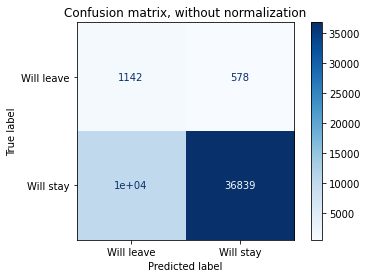

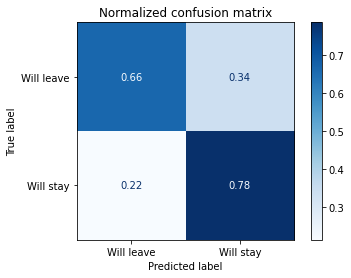

In [32]:
import matplotlib.pyplot as plt

from sklearn.metrics import plot_confusion_matrix

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, y_test,
                                 display_labels=['Will leave', 'Will stay'],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    # print(title)
    # print(disp.confusion_matrix)


In [33]:
import shap
shap.initjs()

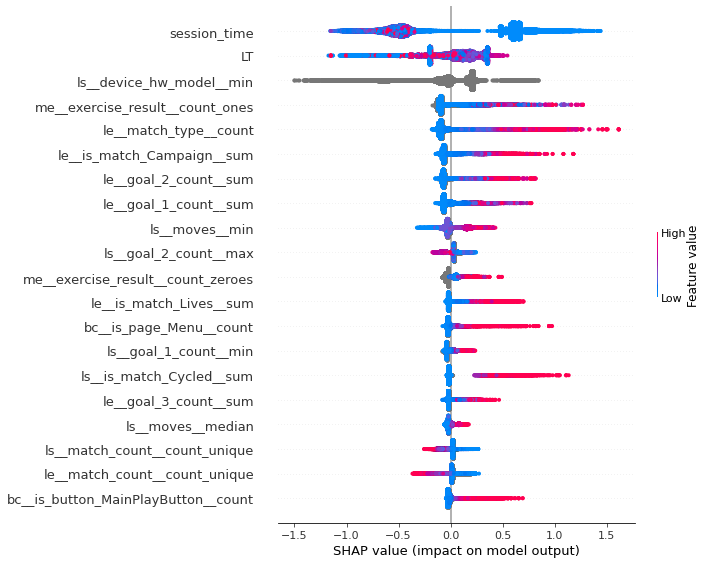

In [34]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

# Save model

In [37]:
model.save_model("../models/retention_catboost.bin")

In [38]:
# from_file = catboost.CatBoostClassifier()

# from_file.load_model("../../models/retention_catboost.bin")